# Time Series Analysis
- - - - - - - -- - - - - - - -- - - - - - - - - - -
A **_time series_** is a series of data points indexed (or listed or graphed) in time order. Time series analysis pertains to methods extracting meaningful statistics from time series data. This is commonly used for forecasting and other models.

#Learning Objectives
- - - - - - - -- - - - - - - -- - - - - - - - - - -
By completing this project, you will be able to:

1. Understand and explore real-world time series data with multiple external variables.

2. Perform advanced feature engineering for machine learning and deep learning models.

3. Compare multiple forecasting techniques: XGBoost, LSTM, etc.

4. Evaluate models using metrics like RMSE, and visualize performance.

5. Derive actionable business insights from model predictions.

6. (Optional) Build a simple dashboard or deploy your model.





# Sections  
- - - - - - - - - - - - - - - - - - - - - - - - - -

1. [📍 Problem Description](#problem-description)  
2. [📥 Data Loading & Merging](#data-loading--merging)  
3. [📊 Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
4. [Preprocessing](#preprocessing)
5. [🧠 Feature Engineering](#feature-engineering)  
6. 📈 Modeling & Forecasting Approaches  
   1. [Baseline (Naive)](#baseline-naive)  
   2. [ARIMA / SARIMA](#arima--sarima)  
   3. [XGBoost](#xgboost)  
   4. [LSTM](#lstm)  
   5. [Transformer](#transformer)  
7. [📉 Evaluation & Visualization](#evaluation--visualization)  
8. [🔍 Error Analysis](#error-analysis)  
9. [💡 Business Insights & Recommendations](#business-insights--recommendations)  
10. [🖥️ Streamlit Dashboard / Deployment (Optional)](#streamlit-dashboard--deployment-optional)  
11. [📌 Conclusion](#conclusion)


[link text](https://)<a id="problem-description"></a>

#🧾 Problem Description

We aim to forecast **daily sales for each Rossmann store**. Accurate predictions help optimize inventory management, staffing, and promotional planning.

### Goals:
- Predict daily sales at store level using historical data and additional features like holidays, promotions, and competition.

### Use Cases:
- Better business planning for individual stores
- Improved customer satisfaction (stock availability)
- Efficient marketing & promotion strategy

### Evaluation Metric:
- RMSE or RMSPE (to be finalized based on competition or business context)


#Data Loading and Merging

We will use pandas for loading the data.


In [1]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv")
store_df = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv")

# View basic shape
print("Train shape:", train_df.shape)
print("Store shape:", store_df.shape)

# View first 3 rows
train_df.head(3)


/tmp/ipython-input-1-114614362.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv")


Train shape: (1017209, 9)
Store shape: (1115, 10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


We will merge train_df and store_df using the common column Store.

To get a full view of each store on each day, we need to combine both.
Use pd.merge() on the Store column using left join so we keep all daily records from train_df.


In [2]:
# Merge train and store datasets
df = pd.merge(train_df, store_df, on='Store', how='left')

# View new shape and sample rows
print("Merged shape:", df.shape)
df.head(3)


Merged shape: (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


#Exploratory Data Analysis (EDA)
What is EDA?

Exploratory Data Analysis (EDA) is the process of visually and statistically examining a dataset to understand its structure, patterns, relationships, and anomalies.

Why is it important?
- Helps uncover trends, seasonality, and outliers in time series data.
- Identifies how external features like promotions or holidays impact sales.
- Guides feature engineering and model selection.
- Ensures data quality before modeling.

First, Check Columns, Dtypes, Missing Values
- To understand the shape of data
- Know which columns need preprocessing before modeling or plotting

In [3]:
# Basic structure
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())

# Data types and non-null counts
df.info()

# Count missing values
missing = df.isnull().sum()
missing[missing > 0]


Shape: (1017209, 18)

Column Names: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  obje

,0
CompetitionDistance,2642
CompetitionOpenSinceMonth,323348
CompetitionOpenSinceYear,323348
Promo2SinceWeek,508031
Promo2SinceYear,508031
PromoInterval,508031


Next Steps:
- Convert Date column to datetime:

  Date-based filtering (e.g., data after 2014) ,Extracting time parts: month, year, weekday, Resampling for time series plots (e.g., weekly average)
- Sort by date (important for trend plots)
- Remove closed stores from trend plots (optional but helps): For clean sales trend analysis, it's better to only keep open days.



In [4]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values('Date')

# Optional: Filter only open stores
df_open = df[df['Open'] == 1].copy()

# Check date range
print("Date range:", df_open['Date'].min(), "to", df_open['Date'].max())


Date range: 2013-01-01 00:00:00 to 2015-07-31 00:00:00


*Sales Trend Over Time (Line Plot)*: Plot average daily sales across all stores over time to understand seasonality, spikes, or dips in overall sales
Helps spot patterns like:
- Weekly/monthly trends
- Impact of holidays
- Promotions spikes



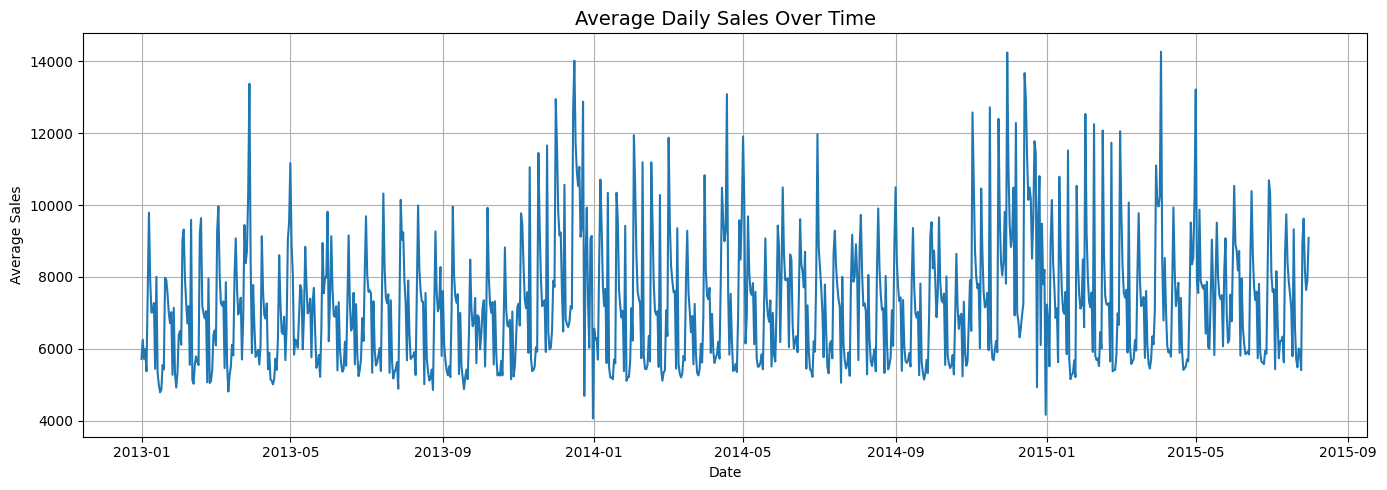

In [5]:
import matplotlib.pyplot as plt

# Aggregate: average daily sales across all stores
daily_sales = df_open.groupby('Date')['Sales'].mean()

# Plot
plt.figure(figsize=(14, 5))
plt.plot(daily_sales.index, daily_sales.values)
plt.title("Average Daily Sales Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


*Sales by Day of Week* : Compare average sales for each day (Monday to Sunday)
- Stores might perform better on specific days (e.g., weekends or mid-week)
- Helps with staff scheduling, marketing, and model features

/tmp/ipython-input-6-1999073939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='viridis')


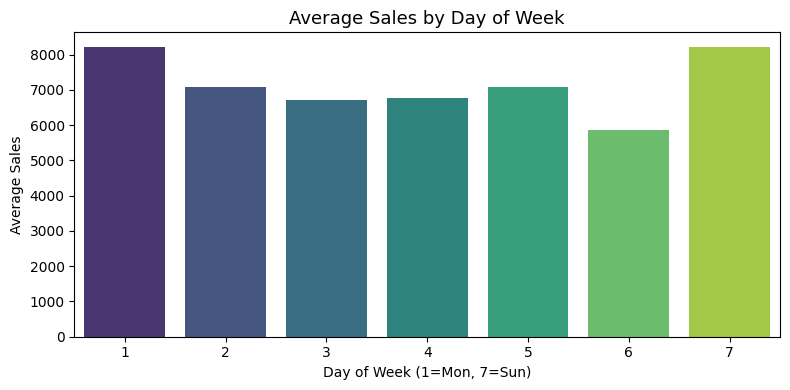

In [6]:
import seaborn as sns

# Average sales per day of the week
dow_sales = df_open.groupby('DayOfWeek')['Sales'].mean()

# Plot
plt.figure(figsize=(8, 4))
sns.barplot(x=dow_sales.index, y=dow_sales.values, palette='viridis')
plt.title("Average Sales by Day of Week", fontsize=13)
plt.xlabel("Day of Week (1=Mon, 7=Sun)")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


*Sales by Month*: See if there are seasonal trends like higher sales in holidays (Dec) or festivals

- Extract month from date
- Plot average sales per month


/tmp/ipython-input-7-1597028466.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')


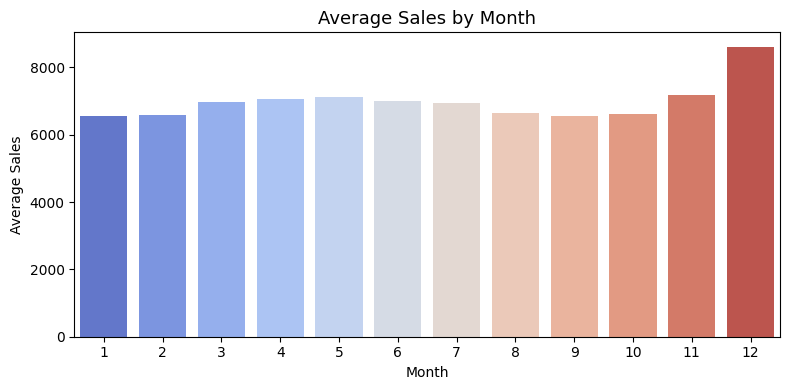

In [7]:
# Add Month column
df_open['Month'] = df_open['Date'].dt.month

# Group and plot
monthly_sales = df_open.groupby('Month')['Sales'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title("Average Sales by Month", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


Sales: Promo vs. Non-Promo:
Exploring how promotions impact sales.
- Helps measure effectiveness of marketing
- Also helps us decide if Promo should be a strong feature in our model (it likely is)

/tmp/ipython-input-8-526089613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='Set2')


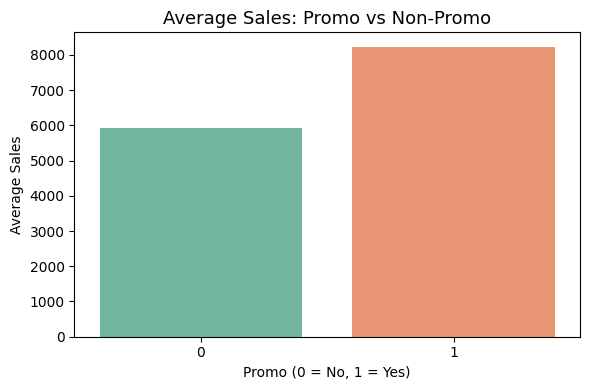

In [8]:
# Group by Promo flag
promo_sales = df_open.groupby('Promo')['Sales'].mean()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette='Set2')
plt.title("Average Sales: Promo vs Non-Promo", fontsize=13)
plt.xlabel("Promo (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


Sales by Store Type:
Now let's analyze sales by StoreType to understand structural differences across stores.
- Different store types might have different footfall and assortment
- Helps in segmentation and tailored forecasting.

/tmp/ipython-input-9-1356836196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=storetype_sales.index, y=storetype_sales.values, palette='pastel')


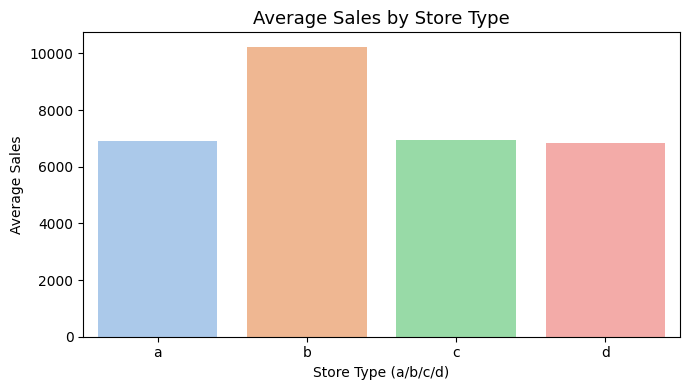

In [9]:
# Group by StoreType
storetype_sales = df_open.groupby('StoreType')['Sales'].mean()

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(x=storetype_sales.index, y=storetype_sales.values, palette='pastel')
plt.title("Average Sales by Store Type", fontsize=13)
plt.xlabel("Store Type (a/b/c/d)")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


Final EDA Plot: Holiday Impact on Sales:-
Compare average sales during holidays vs. non-holidays.
- Sales may go up during festivals or down if stores are closed
- Important for demand forecasting and seasonal planning

/tmp/ipython-input-10-709673277.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='magma')


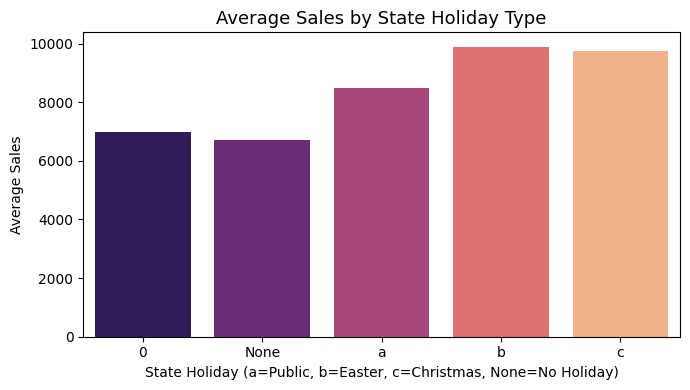

/tmp/ipython-input-10-709673277.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=school_sales.index, y=school_sales.values, palette='cool')


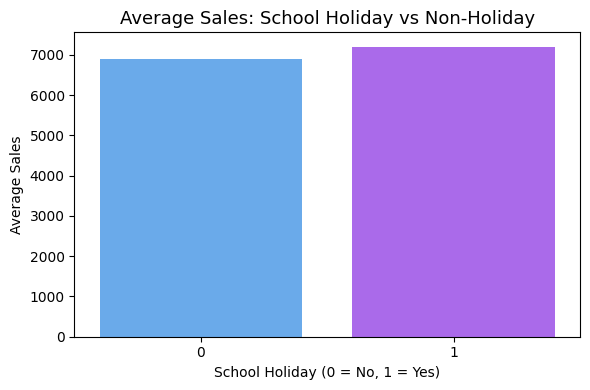

In [10]:
# Clean up StateHoliday: replace '0' with string 'None'
df_open['StateHoliday'] = df_open['StateHoliday'].replace(0, 'None').astype(str)

# Group by holiday type
holiday_sales = df_open.groupby('StateHoliday')['Sales'].mean()

# Plot StateHoliday effect
plt.figure(figsize=(7, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette='magma')
plt.title("Average Sales by State Holiday Type", fontsize=13)
plt.xlabel("State Holiday (a=Public, b=Easter, c=Christmas, None=No Holiday)")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

# School holiday impact
school_sales = df_open.groupby('SchoolHoliday')['Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=school_sales.index, y=school_sales.values, palette='cool')
plt.title("Average Sales: School Holiday vs Non-Holiday", fontsize=13)
plt.xlabel("School Holiday (0 = No, 1 = Yes)")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


### **📊 EDA Insights:**

Overall Sales Trend:
Sales remained fairly stable over time, with a clear peak in December, likely due to holiday season shopping.

Sales by Day of Week:
Highest sales observed on Mondays (1) and Sundays (7). Mid-week days show relatively lower activity.

Sales by Month:
Sales spike in December, indicating strong seasonal effects.

Promotion Impact:
Sales are significantly higher when Promo = 1, showing promotions are effective and influential.

Sales by Store Type:
Store Type b shows the highest average sales, suggesting structural or operational differences (like better location, size, etc.).

Holiday Effect:
Sales are higher during state holidays (a, b, c) and school holidays (SchoolHoliday = 1), highlighting festive shopping behavior.

✅ Conclusion:
Features like Promo, Month, DayOfWeek, StoreType, and Holidays show strong influence on sales.

These should be treated as important features in future modeling.



[link text](https://)<a id="preprocessing"></a>
#🧹 Preprocessing & Feature Engineering
🔧 Preprocessing
- Clean missing values and duplicates

- Convert date columns to datetime format(already done in EDA)

- Encode categorical features (e.g., StoreType, Assortment)

🧠 Feature Engineering
- Extract time-based features: Year, Month, Day, WeekOfYear, IsWeekend

- Create promo-related features: IsPromoMonth, PromoInterval

(Other features will be added based on model requirements)




Handle Missing Values:
We’ll handle each missing column based on meaning — not just blindly fill.
🧪 Strategy:
1. CompetitionDistance (small % missing)
Replace with a large value, assuming no nearby competitor.

2. CompetitionOpenSince[Month/Year]
If missing → assume competition wasn’t open → fill with 0.

3. Promo2Since[Week/Year] & PromoInterval
If missing → assume store not in Promo2 → fill 0 or 'None'

In [11]:
# Fill missing CompetitionDistance with max value
df['CompetitionDistance'].fillna(df['CompetitionDistance'].max(), inplace=True)

# Fill missing CompetitionOpenSince with 0 (means: no competition)
df['CompetitionOpenSinceMonth'].fillna(0, inplace=True)
df['CompetitionOpenSinceYear'].fillna(0, inplace=True)

# Fill Promo2 related columns (missing → not in promo)
df['Promo2SinceWeek'].fillna(0, inplace=True)
df['Promo2SinceYear'].fillna(0, inplace=True)
df['PromoInterval'].fillna('None', inplace=True)
df.isna().sum()


/tmp/ipython-input-11-4165444692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CompetitionDistance'].fillna(df['CompetitionDistance'].max(), inplace=True)
/tmp/ipython-input-11-4165444692.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


Feature Engineering-

Now that no missing value is left, we need Date Converted (already done in EDA) and Create Time-based Features now:

- Models can’t understand dates unless we extract useful features like Month, Year, Week, etc.

- These features help capture seasonality, trends, and store behavior over time

*Create new features:* (adding these features in df_open as we will only be working on stores that are open)

Year

Month

Day

WeekOfYear

DayOfWeek (already present, but we’ll keep as is)

IsWeekend (optional)


In [12]:
# Extract date features
df_open['Year'] = df_open['Date'].dt.year
df_open['Month'] = df_open['Date'].dt.month
df_open['Day'] = df_open['Date'].dt.day
df_open['WeekOfYear'] = df_open['Date'].dt.isocalendar().week.astype(int)
df_open['IsWeekend'] = df_open['DayOfWeek'].apply(lambda x: 1 if x in [6, 7] else 0)


Create IsPromoMonth from PromoInterval:
PromoInterval column tells us which months a store runs special promotions (e.g. 'Feb,May,Aug,Nov').
We'll use this to create a binary column:

✅ 1 if that date falls in a Promo month, else 0.

In [13]:
# Step 1: Create month name column from Date
df_open['MonthStr'] = df_open['Date'].dt.strftime('%b')  # e.g. 'Jan', 'Feb', ...

# Step 2: Define a function to check promo months
def is_promo_month(row):
    if row['Promo2'] == 1 and row['PromoInterval'] != 'None':
        return 1 if row['MonthStr'] in row['PromoInterval'].split(',') else 0
    return 0

# Step 3: Apply function
df_open['IsPromoMonth'] = df_open.apply(is_promo_month, axis=1)

# Optional cleanup: drop helper column
df_open.drop('MonthStr', axis=1, inplace=True)


 Encode Categorical Columns-
 Encoding means converting text labels into numbers so that models can understand and use them.
- ML models can’t work with text directly

We’ll use LabelEncoder because:
- These columns have few unique values
- It’s great for tree-based models like XGBoost, RandomForest
- Keeps the data compact (unlike OneHot which adds extra columns)

In [14]:
from sklearn.preprocessing import LabelEncoder

# Columns to label encode
cat_cols = ['StateHoliday', 'StoreType', 'Assortment']

# Apply LabelEncoder to each
le = LabelEncoder()
for col in cat_cols:
    df_open[col] = le.fit_transform(df_open[col])


📦 Quick Recap: Final Feature Set in df_open
🎯 Target:
Sales

🧩 Features:

Numerical:
- Customers
- CompetitionDistance
- Promo2SinceWeek, Promo2SinceYear
- CompetitionOpenSinceMonth, CompetitionOpenSinceYear
- Year, Month, Day, WeekOfYear
- IsWeekend, IsPromoMonth
- Promo, Promo2, SchoolHoliday, Open

Categorical (now numeric after encoding):
- StoreType, Assortment, StateHoliday

In [15]:
df_open = df_open.drop(columns=['PromoInterval'])
#PromoInterval: already captured by IsPromoMonth, and it's still object dtype


### 🔀 Splitting Features and Target

We separate the dataset into:
- `X`: all input features
- `y`: target variable (`Sales`)


In [16]:
X = df_open.drop(columns=['Sales'])
y = df_open['Sales']


#🎯Train a Baseline Model
**Model Selection – Why Random Forest Regressor?**
Random Forest is an ensemble of decision trees. Each tree makes a prediction, and the forest averages them (for regression).


Train-Test Split (Time-Aware)

We can’t use random split, because:

- Future data must not "leak" into past training
- We must simulate a real-world setting: model sees past → predicts future

So, we use 80/20 split: 80% of the oldest data for training, and 20% of the most recent data for testing.

In [ ]:
# Sort by Date (just in case)
df_open = df_open.sort_values("Date")

# Choose split point (80% for train)
split_date = df_open['Date'].quantile(0.8)

# Split
train = df_open[df_open['Date'] <= split_date]
test = df_open[df_open['Date'] > split_date]

# Define features & target
X_train = train.drop(columns=['Sales'])
y_train = train['Sales']
X_test = test.drop(columns=['Sales'])
y_test = test['Sales']

# Confirm shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Date range train:", train['Date'].min(), "→", train['Date'].max())
print("Date range test :", test['Date'].min(), "→", test['Date'].max())


Train shape: (676009, 22)
Test shape: (168383, 22)
Date range train: 2013-01-01 00:00:00 → 2015-01-30 00:00:00
Date range test : 2015-01-31 00:00:00 → 2015-07-31 00:00:00


💬 Drop Date for Random Forest?

🚫 Why we don’t use Date directly:
Date is a timestamp, which Random Forest doesn’t understand natively.
- Even if encoded, raw date doesn't help — instead, we already extracted: Year, Month, Day, WeekOfYear, IsWeekend, etc.
- These derived features capture the useful temporal patterns.

➡️ So Date becomes redundant for Random Forest.

✅ But we keep it in df_open for future LSTM & time series models, where sequence matters.

✅ What We’ll Do:
- Create a new copy: df_randomforest
- Drop the Date column from this new DataFrame only



In [ ]:
# Create a safe copy for Random Forest
df_randomforest = df_open.copy()

# Drop the 'Date' column
df_randomforest = df_randomforest.drop(columns=['Date'])

# Split again using same time-based logic
train_rf = df_randomforest[df_open['Date'] <= split_date]
test_rf = df_randomforest[df_open['Date'] > split_date]

# Create X and y
X_train_rf = train_rf.drop(columns=['Sales'])
y_train_rf = train_rf['Sales']
X_test_rf = test_rf.drop(columns=['Sales'])
y_test_rf = test_rf['Sales']

# Confirm shape
print("X_train_rf shape:", X_train_rf.shape)
print("X_test_rf shape:", X_test_rf.shape)


X_train_rf shape: (676009, 21)
X_test_rf shape: (168383, 21)


🌲 Step: Train Random Forest Regressor

✅ Why Random Forest?
- Handles non-linear patterns well
- Robust to outliers and overfitting
- Works with mixed feature types
- Fast to train and gives decent baseline results

🧠 Model Evaluation Metric:
We’ll use Root Mean Squared Error (RMSE) as it:
- Penalizes large errors
- Keeps same unit as target (Sales)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Train the model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train_rf, y_train_rf)

# Step 2: Predict on test
y_pred_rf = model_rf.predict(X_test_rf)

# Step 3: Evaluate
rmse_rf = np.sqrt(mean_squared_error(y_test_rf, y_pred_rf))
print("📉 RMSE (Random Forest):", rmse_rf)


📉 RMSE (Random Forest): 576.9075975911143


- On average, the model's prediction is off by ~577 sales units per store-day.
- Considering that daily sales usually range 6000–7000+, this is a ~8–10% error, which is decent for a first model with no tuning.



🧾 joblib.dump(model, 'rf_model.pkl')

What it does:
- Saves your trained model to a file named 'rf_model.pkl' on your system.

Why it's important:
- Once a model is trained, it may take minutes or hours to retrain again.

With this line, you save the trained model so that:
- You don't have to train it again tomorrow
- You can just load and use it instantly

In [ ]:
import joblib

joblib.dump(model_rf, 'model_rf.pkl')  # save to file


['model_rf.pkl']

#📈 Training a XGBoost Model
XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm based on decision trees. It's widely used in Kaggle competitions and real-world forecasting tasks.
- It handles non-linear patterns in data better than simple models
- Works well with mixed features (time, promo, store types, etc.)
- Can handle missing values and categorical encoding
- Faster and more accurate than traditional tree models like Random Forest in many cases



We’ll create a new DataFrame: df_xgb

⚙️ Additional Time Series Features to add:
- Lag Features → Previous day's sales (Sales_lag_1, etc.)
- Rolling Means → Average sales over past 7 or 30 days
- Maybe: Customers_lag_1, etc. later

These will help the model understand momentum, trends, and recent patterns, which are key for accurate sales forecasting.

In [17]:
# Step 1: Create new copy
df_xgb = df_open.copy()

# Step 2: Sort properly
df_xgb = df_xgb.sort_values(['Store', 'Date'])

# Step 3: Lag features
df_xgb['Sales_lag_1'] = df_xgb.groupby('Store')['Sales'].shift(1)
df_xgb['Sales_lag_7'] = df_xgb.groupby('Store')['Sales'].shift(7)

# Step 4: Rolling average
df_xgb['Sales_roll_mean_7'] = df_xgb.groupby('Store')['Sales'].shift(1).rolling(7).mean().reset_index(level=0, drop=True)
df_xgb['Sales_roll_mean_30'] = df_xgb.groupby('Store')['Sales'].shift(1).rolling(30).mean().reset_index(level=0, drop=True)

# Step 5: Drop rows with NaN
df_xgb = df_xgb.dropna().reset_index(drop=True)

# ✅ Confirm
print(df_xgb[['Sales', 'Sales_lag_1', 'Sales_lag_7', 'Sales_roll_mean_7', 'Sales_roll_mean_30']].head())


   Sales  Sales_lag_1  Sales_lag_7  Sales_roll_mean_7  Sales_roll_mean_30
0   6280       6959.0       6751.0        6229.000000         6651.166667
1   6682       6280.0       5732.0       21246.571429        21163.233333
2   4776       6682.0       5345.0        6602.000000         6289.900000
3   5237       4776.0       5822.0        4680.000000         4930.200000
4   2246       5237.0       5916.0        3691.000000         4137.166667


Time-Based Train-Test Split for XGBoost:
- Sort df_xgb by Date
- Use 80% for training, 20% for testing
- Prepare X_train, X_test, y_train, y_test

In [18]:
from sklearn.model_selection import train_test_split

# Step 1: Sort by date (already sorted, but just to be safe)
df_xgb = df_xgb.sort_values('Date')

# Step 2: Define target and features
X_xgb = df_xgb.drop(columns=['Sales', 'Date'])  # Keep Date out for now
y_xgb = df_xgb['Sales']

# Step 3: Time-aware split: 80% train, 20% test
split_index = int(len(df_xgb) * 0.8)

X_train_xgb = X_xgb.iloc[:split_index]
X_test_xgb = X_xgb.iloc[split_index:]
y_train_xgb = y_xgb.iloc[:split_index]
y_test_xgb = y_xgb.iloc[split_index:]

# Confirm split shape
print("Train:", X_train_xgb.shape, "Test:", X_test_xgb.shape)
print("Train Date Range:", df_xgb['Date'].iloc[:split_index].min(), "→", df_xgb['Date'].iloc[:split_index].max())
print("Test Date Range :", df_xgb['Date'].iloc[split_index:].min(), "→", df_xgb['Date'].iloc[split_index:].max())


Train: (170442, 25) Test: (42611, 25)
Train Date Range: 2013-06-04 00:00:00 → 2015-03-05 00:00:00
Test Date Range : 2015-03-05 00:00:00 → 2015-07-31 00:00:00


Train XGBoost Model: Train a regression model to predict Sales.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Initialize model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

# Step 2: Train
xgb_model.fit(X_train_xgb, y_train_xgb)

# Step 3: Predict
y_pred_xgb = xgb_model.predict(X_test_xgb)

# Step 4: Evaluate
rmse_xgb = np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
print("📉 RMSE (XGBoost):", round(rmse_xgb, 2))


📉 RMSE (XGBoost): 607.97


XGBoost RMSE: 608, which is slightly worse than Random Forest (577)

Now we will save our model in google drive:

In [ ]:
import joblib



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
joblib.dump(xgb_model, '/content/drive/MyDrive/xgb_model.pkl')


['/content/drive/MyDrive/xgb_model.pkl']

In [ ]:
!ls /content/drive/MyDrive/*.pkl


/content/drive/MyDrive/xgb_model.pkl


#LSTM (Deep Learning)

LSTM (Long Short-Term Memory) models are designed for time series and sequence data, and can outperform tree-based models when:
- There are long-term dependencies or repeating seasonal patterns.
- The temporal sequence matters more than static features.


In [19]:
import pandas as pd

# Load datasets
df_train_lstm = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv')
df_store_lstm = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv')

# Merge on 'Store' column
df_lstm = pd.merge(df_train_lstm, df_store_lstm, on='Store', how='left')

# Show first few rows
df_lstm.head()


/tmp/ipython-input-19-1251045159.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_lstm = pd.read_csv('https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [20]:
# 1. Rename all columns with _lstm suffix for consistency
df_lstm.columns = [col + '_lstm' for col in df_lstm.columns]

# 2. Convert Date to datetime
df_lstm['Date_lstm'] = pd.to_datetime(df_lstm['Date_lstm'])

# 3. Sort by Store and Date
df_lstm.sort_values(by=['Store_lstm', 'Date_lstm'], inplace=True)

# 4. Remove rows where Sales = 0 but store was open (optional)
df_lstm = df_lstm[~((df_lstm['Sales_lstm'] == 0) & (df_lstm['Open_lstm'] == 1))]

# Show info
df_lstm[['Store_lstm', 'Date_lstm', 'Sales_lstm']].head()


,Store_lstm,Date_lstm,Sales_lstm
1016095,1,2013-01-01,0
1014980,1,2013-01-02,5530
1013865,1,2013-01-03,4327
1012750,1,2013-01-04,4486
1011635,1,2013-01-05,4997


In [21]:
from sklearn.preprocessing import LabelEncoder

# Fill missing numeric values correctly
df_lstm['CompetitionDistance_lstm'] = df_lstm['CompetitionDistance_lstm'].fillna(0)
df_lstm['CompetitionOpenSinceMonth_lstm'] = df_lstm['CompetitionOpenSinceMonth_lstm'].fillna(0)
df_lstm['CompetitionOpenSinceYear_lstm'] = df_lstm['CompetitionOpenSinceYear_lstm'].fillna(0)
df_lstm['Promo2SinceWeek_lstm'] = df_lstm['Promo2SinceWeek_lstm'].fillna(0)
df_lstm['Promo2SinceYear_lstm'] = df_lstm['Promo2SinceYear_lstm'].fillna(0)
df_lstm['PromoInterval_lstm'] = df_lstm['PromoInterval_lstm'].fillna('None')

# Encode categorical columns
label_cols = ['StateHoliday_lstm', 'StoreType_lstm', 'Assortment_lstm', 'PromoInterval_lstm']

for col in label_cols:
    df_lstm[col] = df_lstm[col].astype(str)  # convert all to string
    le = LabelEncoder()
    df_lstm[col] = le.fit_transform(df_lstm[col])


In [22]:
# Extracting datetime features
df_lstm['Year_lstm'] = df_lstm['Date_lstm'].dt.year
df_lstm['Month_lstm'] = df_lstm['Date_lstm'].dt.month
df_lstm['Day_lstm'] = df_lstm['Date_lstm'].dt.day
df_lstm['DayOfWeek_lstm'] = df_lstm['Date_lstm'].dt.dayofweek
df_lstm['WeekOfYear_lstm'] = df_lstm['Date_lstm'].dt.isocalendar().week.astype(int)

# Preview
df_lstm[['Date_lstm', 'Year_lstm', 'Month_lstm', 'Day_lstm', 'DayOfWeek_lstm', 'WeekOfYear_lstm']].head()


,Date_lstm,Year_lstm,Month_lstm,Day_lstm,DayOfWeek_lstm,WeekOfYear_lstm
1016095,2013-01-01,2013,1,1,1,1
1014980,2013-01-02,2013,1,2,2,1
1013865,2013-01-03,2013,1,3,3,1
1012750,2013-01-04,2013,1,4,4,1
1011635,2013-01-05,2013,1,5,5,1


In [24]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Make sales stationary using log1p
df_lstm['Sales_lstm'] = np.log1p(df_lstm['Sales_lstm'])

# 2. Select continuous numeric columns to scale
scale_cols_lstm = [
    'Sales_lstm', 'Customers_lstm', 'CompetitionDistance_lstm',
    'Promo2SinceWeek_lstm', 'Promo2SinceYear_lstm',
    'CompetitionOpenSinceMonth_lstm', 'CompetitionOpenSinceYear_lstm',
    'Year_lstm', 'Month_lstm', 'Day_lstm', 'DayOfWeek_lstm', 'WeekOfYear_lstm'
]

# 3. Apply MinMaxScaler
scaler_lstm = MinMaxScaler()
df_lstm[scale_cols_lstm] = scaler_lstm.fit_transform(df_lstm[scale_cols_lstm])


In [25]:
import numpy as np

# Define sequence length
sequence_length_lstm = 30

# Features to include (drop date, id, and non-numeric if needed)
drop_cols_lstm = ['Date_lstm', 'Id_lstm']
feature_cols_lstm = [col for col in df_lstm.columns if col not in drop_cols_lstm + ['Sales_lstm']]

# Create sequences
X_lstm, y_lstm = [], []

# Group by store
for store_id, group in df_lstm.groupby('Store_lstm'):
    group = group.reset_index(drop=True)

    if len(group) > sequence_length_lstm:
        for i in range(len(group) - sequence_length_lstm):
            seq_x = group.loc[i:i+sequence_length_lstm-1, feature_cols_lstm].values
            seq_y = group.loc[i+sequence_length_lstm, 'Sales_lstm']
            X_lstm.append(seq_x)
            y_lstm.append(seq_y)

# Convert to numpy arrays
X_lstm = np.array(X_lstm, dtype=np.float32)
y_lstm = np.array(y_lstm, dtype=np.float32)

# Show shapes
X_lstm.shape, y_lstm.shape


((983705, 30, 20), (983705,))

In [26]:
# Step 1: Get top 50 store IDs by total sales
top_stores_lstm = df_lstm.groupby('Store_lstm')['Sales_lstm'].sum().nlargest(50).index

# Step 2: Filter original dataframe
df_lstm = df_lstm[df_lstm['Store_lstm'].isin(top_stores_lstm)].reset_index(drop=True)

# Optional sanity check
print("Filtered store count:", df_lstm['Store_lstm'].nunique())


Filtered store count: 50


In [27]:
X_lstm, y_lstm = [], []

for store_id, group in df_lstm.groupby('Store_lstm'):
    group = group.reset_index(drop=True)
    if len(group) > sequence_length_lstm:
        for i in range(len(group) - sequence_length_lstm):
            seq_x = group.loc[i:i+sequence_length_lstm-1, feature_cols_lstm].values
            seq_y = group.loc[i+sequence_length_lstm, 'Sales_lstm']
            X_lstm.append(seq_x)
            y_lstm.append(seq_y)

# Convert to arrays
X_lstm = np.array(X_lstm, dtype=np.float32)
y_lstm = np.array(y_lstm, dtype=np.float32)

# Check shape
X_lstm.shape, y_lstm.shape


((45597, 30, 20), (45597,))

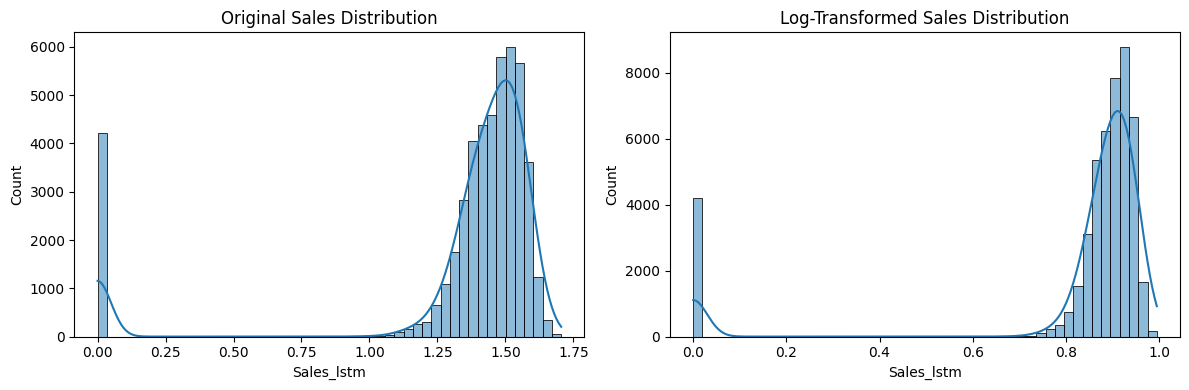

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(np.expm1(df_lstm['Sales_lstm']), bins=50, kde=True)
plt.title("Original Sales Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df_lstm['Sales_lstm'], bins=50, kde=True)
plt.title("Log-Transformed Sales Distribution")

plt.tight_layout()
plt.show()


In [29]:
print("Sample sequence (X_lstm[0]) shape:", X_lstm[0].shape)
print("Sample target (y_lstm[0]):", y_lstm[0])


Sample sequence (X_lstm[0]) shape: (30, 20)
Sample target (y_lstm[0]): 0.8667065


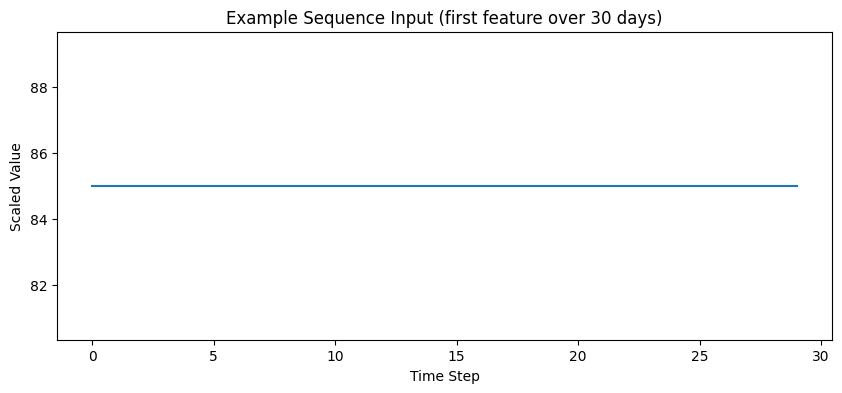

In [30]:
plt.figure(figsize=(10, 4))
plt.plot(X_lstm[0][:, 0])  # feature 0: usually Customers or DayOfWeek
plt.title("Example Sequence Input (first feature over 30 days)")
plt.xlabel("Time Step")
plt.ylabel("Scaled Value")
plt.show()


In [31]:
print("Feature columns order:")
for i, col in enumerate(feature_cols_lstm):
    print(f"{i}: {col}")


Feature columns order:
0: Store_lstm
1: DayOfWeek_lstm
2: Customers_lstm
3: Open_lstm
4: Promo_lstm
5: StateHoliday_lstm
6: SchoolHoliday_lstm
7: StoreType_lstm
8: Assortment_lstm
9: CompetitionDistance_lstm
10: CompetitionOpenSinceMonth_lstm
11: CompetitionOpenSinceYear_lstm
12: Promo2_lstm
13: Promo2SinceWeek_lstm
14: Promo2SinceYear_lstm
15: PromoInterval_lstm
16: Year_lstm
17: Month_lstm
18: Day_lstm
19: WeekOfYear_lstm


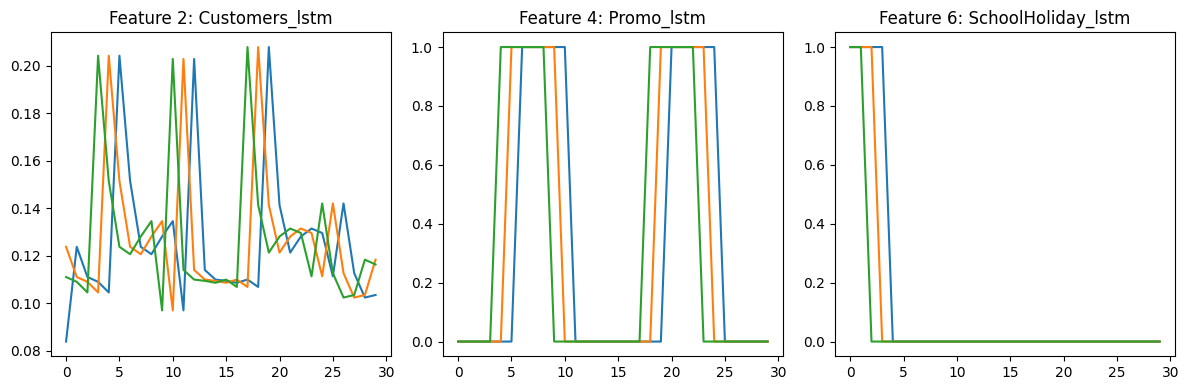

In [32]:
plt.figure(figsize=(12, 4))
for i, feat_idx in enumerate([2, 4, 6]):  # Customers, Promo, SchoolHoliday
    plt.subplot(1, 3, i+1)
    for j in range(3):
        plt.plot(X_lstm[j][:, feat_idx])
    plt.title(f"Feature {feat_idx}: {feature_cols_lstm[feat_idx]}")
plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build model
model_lstm = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(1)
])

# Compile model
model_lstm.compile(optimizer='adam', loss='mse')

# Summary
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        21,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,209 (133.63 KB)

 Trainable params: 34,209 (133.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_lstm = model_lstm.fit(
    X_lstm, y_lstm,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)


Epoch 1/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.1312 - val_loss: 0.0631
Epoch 2/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0720 - val_loss: 0.0648
Epoch 3/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0713 - val_loss: 0.0597
Epoch 4/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0638 - val_loss: 0.0553
Epoch 5/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0559 - val_loss: 0.0478
Epoch 6/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0520 - val_loss: 0.0458
Epoch 7/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0474 - val_loss: 0.0472
Epoch 8/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0458 - val_loss: 0.0500
Epoch 9/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0452 - val_loss: 0.0437
Epoch 10/10
642/642 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0378 - val_loss: 0.0376


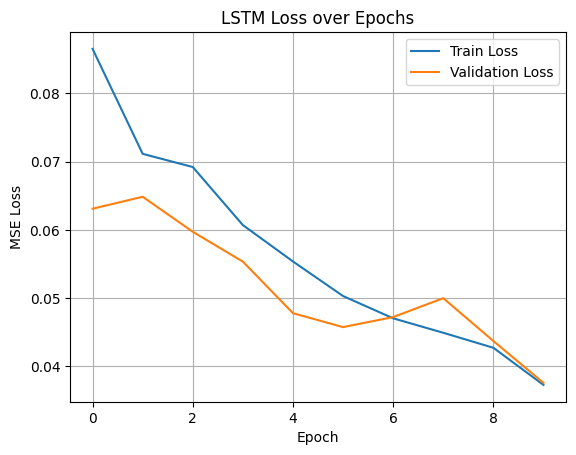

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Predict log-transformed sales
y_pred_lstm = model_lstm.predict(X_lstm, verbose=0)


In [ ]:
print("Predicted shape:", y_pred_lstm.shape)
print("Target shape:", y_lstm.shape)


Predicted shape: (45597, 1)
Target shape: (45597,)


In [ ]:
import numpy as np

# Undo log1p
y_true_lstm = np.expm1(y_lstm)                  # actual sales
y_pred_lstm = np.expm1(y_pred_lstm.flatten())   # predicted sales


In [ ]:
for i in range(5):
    print(f"Actual: {y_true_lstm[i]:.2f} | Predicted: {y_pred_lstm[i]:.2f}")


Actual: 1.41 | Predicted: 1.23
Actual: 1.41 | Predicted: 1.29
Actual: 1.40 | Predicted: 1.38
Actual: 0.00 | Predicted: 0.26
Actual: 1.52 | Predicted: 1.14


In [ ]:
from sklearn.metrics import mean_squared_error

rmse_lstm = np.sqrt(mean_squared_error(y_true_lstm, y_pred_lstm))
print(f"📉 Final LSTM RMSE (Per-Store Normalized): {rmse_lstm:.2f}")


📉 Final LSTM RMSE (Per-Store Normalized): 0.29


In [ ]:
# Avoid division by zero
mask = y_true_lstm != 0

# Absolute percentage error
ape = np.abs((y_pred_lstm[mask] - y_true_lstm[mask]) / y_true_lstm[mask])

# Accuracy: % of predictions within 20% of true value
accuracy_20 = np.mean(ape < 0.2) * 100
print(f"✅ Prediction Accuracy within 20% error: {accuracy_20:.2f}%")


✅ Prediction Accuracy within 20% error: 88.52%


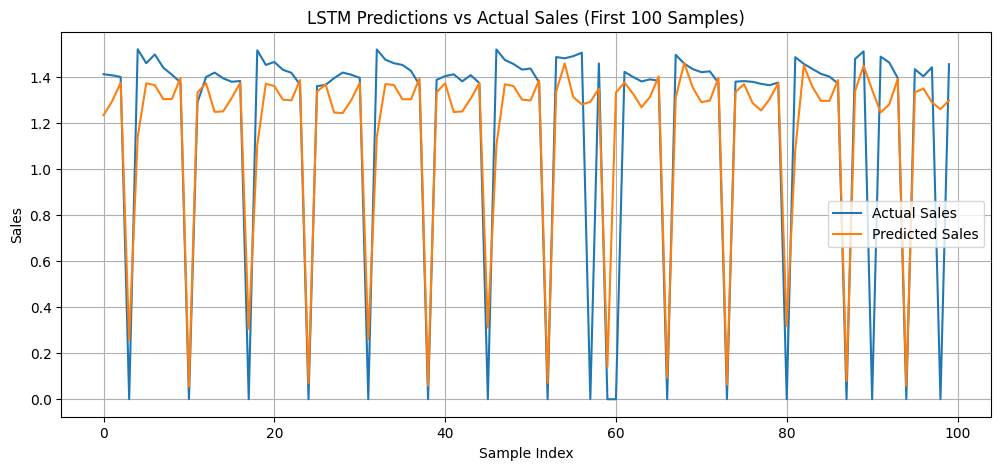

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_true_lstm[:100], label='Actual Sales')
plt.plot(y_pred_lstm[:100], label='Predicted Sales')
plt.title('LSTM Predictions vs Actual Sales (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


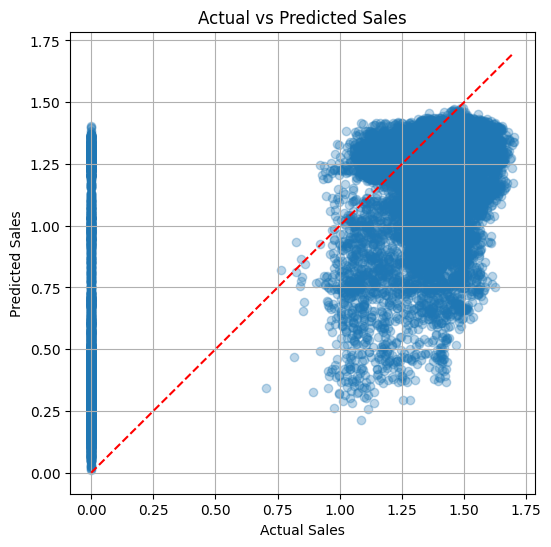

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_true_lstm, y_pred_lstm, alpha=0.3)
plt.plot([0, max(y_true_lstm)], [0, max(y_true_lstm)], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import joblib

# Save XGBoost model
joblib.dump(model_lstm, '/content/drive/MyDrive/model_lstm.pkl')





['/content/drive/MyDrive/model_lstm.pkl']

In [ ]:
!ls /content/drive/MyDrive/*.pkl


/content/drive/MyDrive/model_lstm.pkl  /content/drive/MyDrive/xgb_model.pkl


#🔷 Transformer Model

The Transformer is a deep learning model originally designed for natural language processing (NLP), but it has shown strong performance in time series forecasting due to its ability to model long-range dependencies.
Unlike traditional models like LSTM or RNN, which process sequences step-by-step, Transformers use self-attention mechanisms to process all time steps in parallel, allowing the model to focus on the most relevant parts of the input sequence, regardless of their position.

🔶 Why We’re Using Transformer for Rossmann Dataset-

The Rossmann dataset contains complex patterns over time due to promotions, holidays, competition, and seasonality. Traditional models often struggle with:

- Capturing long-term dependencies (e.g., impact of a promo weeks ago)
- Handling multiple features across time and store dimensions
- We are using a Transformer model because:
- It can attend to key past events (e.g., previous promotions or holidays).
- It supports parallel computation, making training faster.
- It performs well in situations with rich multi-feature inputs and non-linear patterns.

This makes it a strong candidate to improve forecasting accuracy on our dataset.

Data Loading & Initial Inspection


In [33]:
import pandas as pd

# Load the datasets
df_train_tfr = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv")
df_store_tfr = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/store.csv")

# Show basic info
print(df_train_tfr.shape)
print(df_store_tfr.shape)
df_train_tfr.head(2), df_store_tfr.head(2)


/tmp/ipython-input-33-18878308.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train_tfr = pd.read_csv("https://raw.githubusercontent.com/RPI-DATA/tutorials-intro/master/rossmann-store-sales/rossmann-store-sales/train.csv")


(1017209, 9)
(1115, 10)


(   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
 0      1          5  2015-07-31   5263        555     1      1            0   
 1      2          5  2015-07-31   6064        625     1      1            0   
 
    SchoolHoliday  
 0              1  
 1              1  ,
    Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
 0      1         c          a               1270.0                        9.0   
 1      2         a          a                570.0                       11.0   
 
    CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
 0                    2008.0       0              NaN              NaN   
 1                    2007.0       1             13.0           2010.0   
 
      PromoInterval  
 0              NaN  
 1  Jan,Apr,Jul,Oct  )

Merge Data & Convert Date

In [34]:
# Merge on Store
df_merged_tfr = pd.merge(df_train_tfr, df_store_tfr, on='Store', how='left')

# Convert 'Date' to datetime
df_merged_tfr['Date'] = pd.to_datetime(df_merged_tfr['Date'])

# Quick check
df_merged_tfr[['Store', 'Date', 'Sales', 'Promo', 'PromoInterval']].head(2)


,Store,Date,Sales,Promo,PromoInterval
0,1,2015-07-31,5263,1,NaN
1,2,2015-07-31,6064,1,"Jan,Apr,Jul,Oct"


 Create Basic Time Features

In [35]:
# Create temporal features
df_merged_tfr['Year_tfr'] = df_merged_tfr['Date'].dt.year
df_merged_tfr['Month_tfr'] = df_merged_tfr['Date'].dt.month
df_merged_tfr['Day_tfr'] = df_merged_tfr['Date'].dt.day
df_merged_tfr['DayOfWeek_tfr'] = df_merged_tfr['Date'].dt.dayofweek  # Monday=0
df_merged_tfr['WeekOfYear_tfr'] = df_merged_tfr['Date'].dt.isocalendar().week
df_merged_tfr['IsWeekend_tfr'] = df_merged_tfr['DayOfWeek_tfr'].isin([5, 6]).astype(int)


Handle PromoInterval & Ongoing Promotions
- Promo2 is not always active. It follows a pattern (e.g., "Jan,Apr,Jul,Oct").
- We need to tell the model whether a promotion was actually running on a given day.

IsPromo2Active_tfr → 1 if Promo2 is active on that date, 0 otherwise

In [36]:
import numpy as np

# Fill NaNs in PromoInterval with empty string
df_merged_tfr['PromoInterval'] = df_merged_tfr['PromoInterval'].fillna('')

# Get current month name
df_merged_tfr['MonthStr_tfr'] = df_merged_tfr['Date'].dt.strftime('%b')

# Is the current month in the store's PromoInterval?
df_merged_tfr['IsPromoMonth_tfr'] = df_merged_tfr.apply(
    lambda row: int(row['MonthStr_tfr'] in row['PromoInterval'].split(',')),
    axis=1
)

# Is Promo2 active this date? Combine all conditions
df_merged_tfr['IsPromo2Active_tfr'] = 0
mask_tfr = (
    (df_merged_tfr['Promo2'] == 1) &
    (df_merged_tfr['Promo2SinceYear'].notnull()) &
    (
        (df_merged_tfr['Date'].dt.year > df_merged_tfr['Promo2SinceYear']) |
        ((df_merged_tfr['Date'].dt.year == df_merged_tfr['Promo2SinceYear']) &
         (df_merged_tfr['WeekOfYear_tfr'] >= df_merged_tfr['Promo2SinceWeek']))
    ) &
    (df_merged_tfr['IsPromoMonth_tfr'] == 1)
)
df_merged_tfr.loc[mask_tfr, 'IsPromo2Active_tfr'] = 1


Handle Missing Values

In [37]:
# Fill missing CompetitionDistance with a large value (store has no nearby competitor)
df_merged_tfr['CompetitionDistance'] = df_merged_tfr['CompetitionDistance'].fillna(200000.0)

# Fill other missing numeric columns with zero
fill_zero_cols_tfr = [
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2SinceWeek', 'Promo2SinceYear'
]
df_merged_tfr[fill_zero_cols_tfr] = df_merged_tfr[fill_zero_cols_tfr].fillna(0)


Add Lag Features

In [38]:
# Sort by Store and Date for correct lagging
df_merged_tfr = df_merged_tfr.sort_values(['Store', 'Date'])

# Define lag days
lag_days_tfr = [1, 7, 14, 30]

# Create lag features
for lag in lag_days_tfr:
    df_merged_tfr[f'Sales_lag{lag}_tfr'] = df_merged_tfr.groupby('Store')['Sales'].shift(lag)

# Create rolling mean features
df_merged_tfr['Sales_roll7_tfr'] = df_merged_tfr.groupby('Store')['Sales'].shift(1).rolling(window=7).mean().reset_index(level=0, drop=True)
df_merged_tfr['Sales_roll30_tfr'] = df_merged_tfr.groupby('Store')['Sales'].shift(1).rolling(window=30).mean().reset_index(level=0, drop=True)


Encode Categorical Features

In [39]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
cat_cols_tfr = ['StoreType', 'Assortment', 'StateHoliday']
label_encoders_tfr = {}

for col in cat_cols_tfr:
    df_merged_tfr[col] = df_merged_tfr[col].astype(str)  # Fix: convert all to string
    le = LabelEncoder()
    df_merged_tfr[col] = le.fit_transform(df_merged_tfr[col])
    label_encoders_tfr[col] = le


Final Data Prep for Transformer

What we’ll do now:
- Filter rows where store was open (Open == 1)
- Drop rows with any NaN (from lag/rolling features)
- Select relevant features (drop ID-like or unnecessary columns)
- Reshape data into 3D format:
- Shape = (num_sequences, sequence_length, num_features)

For example, 100 stores × 365 days → many rolling windows of 30 days

In [40]:
# Step 1: Keep only open days
df_final_tfr = df_merged_tfr[df_merged_tfr['Open'] == 1].copy()

# Step 2: Drop rows with NaNs (due to lag features)
df_final_tfr = df_final_tfr.dropna().reset_index(drop=True)

# Step 3: Select features for model
feature_cols_tfr = [
    'Store', 'DayOfWeek_tfr', 'Promo', 'StateHoliday', 'SchoolHoliday',
    'StoreType', 'Assortment', 'CompetitionDistance',
    'IsPromo2Active_tfr', 'IsWeekend_tfr',
    'Year_tfr', 'Month_tfr', 'Day_tfr', 'WeekOfYear_tfr',
    'Sales_lag1_tfr', 'Sales_lag7_tfr', 'Sales_lag14_tfr', 'Sales_lag30_tfr',
    'Sales_roll7_tfr', 'Sales_roll30_tfr'
]

target_col_tfr = 'Sales'

# Step 4: Define sequence length
sequence_length_tfr = 30

# Step 5: Prepare sequences
X_tfr, y_tfr = [], []

# Get top 100 stores by total sales
top_stores_tfr = df_final_tfr.groupby('Store')['Sales'].sum().sort_values(ascending=False).head(100).index

# Filter to only those stores
df_filtered_tfr = df_final_tfr[df_final_tfr['Store'].isin(top_stores_tfr)].copy()


# Group by store
for _, group in df_filtered_tfr.groupby('Store'):
    for i in range(sequence_length_tfr, len(group)):
        seq_x = group[feature_cols_tfr].iloc[i-sequence_length_tfr:i].values
        seq_y = group[target_col_tfr].iloc[i]
        X_tfr.append(seq_x)
        y_tfr.append(seq_y)

import numpy as np
X_tfr = np.array(X_tfr).astype(np.float32)
y_tfr = np.array(y_tfr).astype(np.float32)

# Check shape
print("X shape:", X_tfr.shape)  # (samples, timesteps, features)
print("y shape:", y_tfr.shape)


X shape: (70967, 30, 20)
y shape: (70967,)


Final check before training

In [41]:
print("X_tfr shape:", X_tfr.shape)
print("y_tfr shape:", y_tfr.shape)
print("X dtype:", X_tfr.dtype, "| y dtype:", y_tfr.dtype)
print("Any NaNs in X?", np.isnan(X_tfr).any())
print("Any NaNs in y?", np.isnan(y_tfr).any())


X_tfr shape: (70967, 30, 20)
y_tfr shape: (70967,)
X dtype: float32 | y dtype: float32
Any NaNs in X? False
Any NaNs in y? False


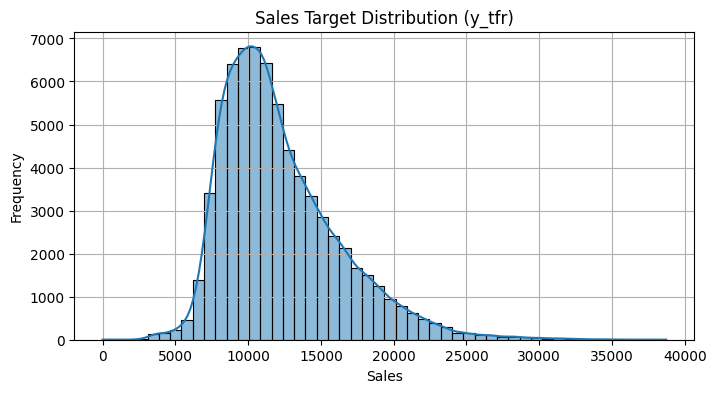

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.histplot(y_tfr, bins=50, kde=True)
plt.title("Sales Target Distribution (y_tfr)")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


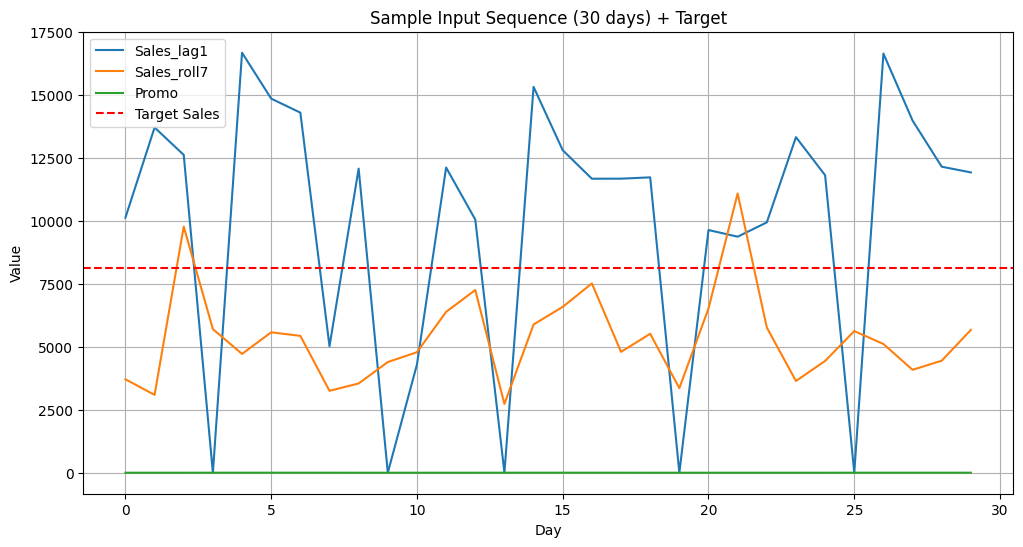

In [43]:
# Pick one sequence (e.g., 0th)
sample_index = 0
sample_x_tfr = X_tfr[sample_index]
sample_y_tfr = y_tfr[sample_index]

# Plot few key features + target
plt.figure(figsize=(12, 6))
plt.plot(sample_x_tfr[:, feature_cols_tfr.index('Sales_lag1_tfr')], label='Sales_lag1')
plt.plot(sample_x_tfr[:, feature_cols_tfr.index('Sales_roll7_tfr')], label='Sales_roll7')
plt.plot(sample_x_tfr[:, feature_cols_tfr.index('Promo')], label='Promo')
plt.axhline(sample_y_tfr, color='red', linestyle='--', label='Target Sales')
plt.title("Sample Input Sequence (30 days) + Target")
plt.xlabel("Day")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


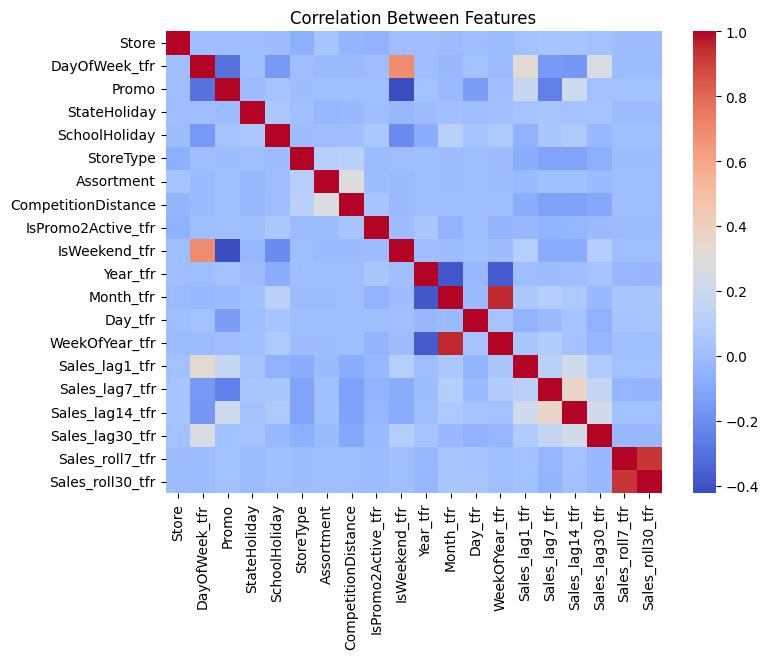

In [44]:
import pandas as pd

# Flatten X to 2D just for correlation check
X_flat_tfr = X_tfr.reshape(-1, X_tfr.shape[2])
df_features_tfr = pd.DataFrame(X_flat_tfr, columns=feature_cols_tfr)

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_features_tfr.corr(), annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Features")
plt.show()


In [45]:
print("Sample input (1st sequence):")
print(pd.DataFrame(sample_x_tfr, columns=feature_cols_tfr).head())
print("\nCorresponding target (Sales):", sample_y_tfr)


Sample input (1st sequence):
   Store  DayOfWeek_tfr  Promo  StateHoliday  SchoolHoliday  StoreType  \
0   25.0            3.0    0.0           0.0            0.0        2.0   
1   25.0            4.0    0.0           0.0            0.0        2.0   
2   25.0            5.0    0.0           0.0            0.0        2.0   
3   25.0            0.0    1.0           0.0            0.0        2.0   
4   25.0            1.0    1.0           0.0            0.0        2.0   

   Assortment  CompetitionDistance  IsPromo2Active_tfr  IsWeekend_tfr  \
0         0.0                430.0                 0.0            0.0   
1         0.0                430.0                 0.0            0.0   
2         0.0                430.0                 0.0            1.0   
3         0.0                430.0                 0.0            0.0   
4         0.0                430.0                 0.0            0.0   

   Year_tfr  Month_tfr  Day_tfr  WeekOfYear_tfr  Sales_lag1_tfr  \
0    2013.0        1

**Why the data is ready:**

1. **Clean & Complete**

   * All missing values handled
   * All data types are consistent (e.g., categorical → label encoded)

2. **Time-aware Features Added**

   * Lag features (1, 7, 14, 30 days)
   * Rolling means (7, 30 days)
   * Calendar/time-based features (day, month, week, etc.)

3. **Promo/Holiday Effects Captured**

   * `IsPromo2Active_tfr`, `StateHoliday`, `SchoolHoliday`, etc.

4. **No NaNs in Final Arrays**

   * `X_tfr` and `y_tfr` are fully numeric and clean

5. **Good Feature Diversity (Verified by Heatmap)**

   * No extreme multicollinearity
   * Useful correlation patterns for learning

6. **Correct 3D Shape for Transformer**

   * Shape = `(70967, 30, 20)` → ready for sequence model
   * Target = 1 sales value per sequence

7. **Memory Optimized**

   * Using top 100 stores avoids RAM crash while retaining strong data quality


Define Transformer Encoder Block now

We'll first define a reusable TransformerBlock layer that mimics the Transformer encoder logic.


*   Adds Multi-head attention, feed-forward layers, residual connections, and normalization.
*   Helps the model learn temporal dependencies from 30-day sequences.

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim),
        ])
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):  # ✅ Fix: default training=None
        attn_output = self.att(inputs, inputs, training=training)  # Self-attention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)

        ffn_output = self.ffn(out1, training=training)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)



We’ll now create the full model using:

* **Input**: `(batch_size, 30, 20)`
* **Transformer block**
* **Global average pooling**
* **Dense layers for regression**



In [47]:
def build_transformer_model_tfr(input_shape, embed_dim=64, num_heads=4, ff_dim=128, dropout_rate=0.1):
    inputs = layers.Input(shape=input_shape)

    # 1. Optional Dense projection to embedding dimension
    x = layers.Dense(embed_dim)(inputs)

    # 2. Transformer block
    x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)

    # 3. Pooling and output
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1)(x)  # Regression output

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model


In [48]:
input_shape_tfr = (X_tfr.shape[1], X_tfr.shape[2])  # (30, 20)

model_tfr = build_transformer_model_tfr(input_shape_tfr)
model_tfr.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_tfr.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30, 64)         │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 30, 64)         │        83,200 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,769 (346.75 KB)

 Trainable params: 88,769 (346.75 KB)

 Non-trainable params: 0 (0.00 B)

🔍 Quick Recap of Model Architecture:

* **Input:** 30-day sequences with 20 features
* **Dense Layer:** Projects 20 → 64 dimensions
* **Transformer Encoder Block:** Learns time dependencies
* **Global Average Pooling:** Condenses time steps to vector
* **Dense Layers:** Final regression head




🔜 Next Step: Train the Model
We'll now train the model with:

Early stopping to avoid overfitting

Validation split for generalization check

Loss = MSE (good for regression)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop_tfr = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_tfr = model_tfr.fit(
    X_tfr, y_tfr,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop_tfr],
    verbose=1
)


Epoch 1/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 137948304.0000 - mae: 10874.0723 - val_loss: 23546332.0000 - val_mae: 3397.2803
Epoch 2/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 15362732.0000 - mae: 2950.9011 - val_loss: 13937403.0000 - val_mae: 2800.5803
Epoch 3/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 11151674.0000 - mae: 2546.8328 - val_loss: 12241265.0000 - val_mae: 2526.5283
Epoch 4/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 10359879.0000 - mae: 2459.3232 - val_loss: 11081786.0000 - val_mae: 2434.1389
Epoch 5/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10188639.0000 - mae: 2448.7615 - val_loss: 11128573.0000 - val_mae: 2431.2515
Epoch 6/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 10033766.0000 - mae: 2429.5476 - val_loss: 10643459.0000 - val_mae: 2399.3496
Epoch 7/50
888/888 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 10097776.0000 - mae: 2430.3997 - val_loss: 10368660.0000 - val_mae: 2408.7786
Epoch 8/50
888/888 ━━━━━━━━━━

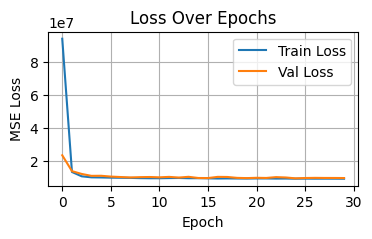

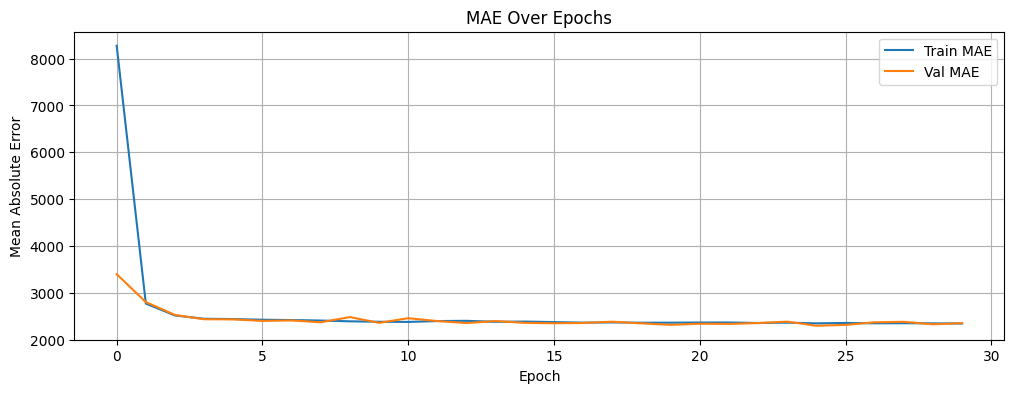

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(4, 2))
plt.plot(history_tfr.history['loss'], label='Train Loss')
plt.plot(history_tfr.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot MAE
plt.figure(figsize=(12, 4))
plt.plot(history_tfr.history['mae'], label='Train MAE')
plt.plot(history_tfr.history['val_mae'], label='Val MAE')
plt.title('MAE Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Split manually to access validation part
split_idx_tfr = int(len(X_tfr) * 0.8)
X_val_tfr = X_tfr[split_idx_tfr:]
y_val_tfr = y_tfr[split_idx_tfr:]

y_pred_tfr = model_tfr.predict(X_val_tfr).flatten()


444/444 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
from sklearn.metrics import mean_squared_error

rmse_tfr = np.sqrt(mean_squared_error(y_val_tfr, y_pred_tfr))
mean_y_tfr = np.mean(y_val_tfr)
accuracy_percent_tfr = 100 * (1 - rmse_tfr / mean_y_tfr)

print(f"📉 RMSE: {rmse_tfr:.2f}")
print(f"✅ Accuracy (~% within sales range): {accuracy_percent_tfr:.2f}%")


📉 RMSE: 3095.06
✅ Accuracy (~% within sales range): 75.15%


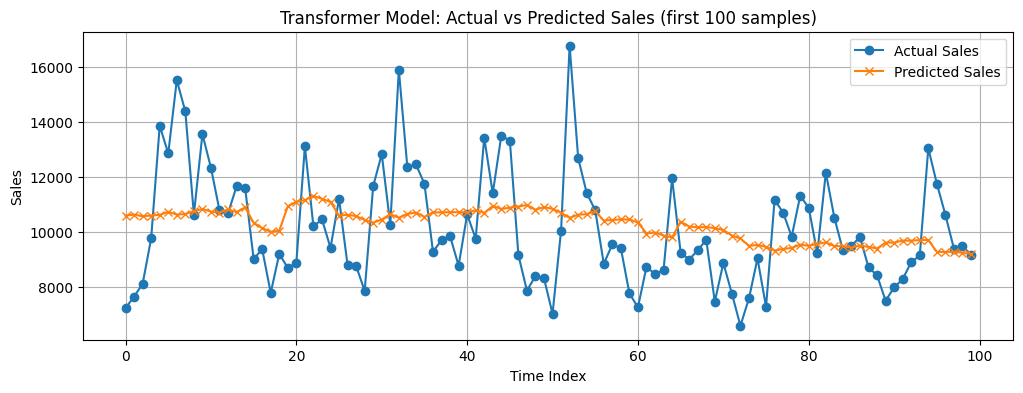

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(y_val_tfr[:100], label='Actual Sales', marker='o')
plt.plot(y_pred_tfr[:100], label='Predicted Sales', marker='x')
plt.title('Transformer Model: Actual vs Predicted Sales (first 100 samples)')
plt.xlabel('Time Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
model_tfr.save('/content/drive/MyDrive/model_tfr_fixed.keras')


#EVALUATIONN

In [50]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [51]:
import os

drive_path = "/content/drive/MyDrive/"

for root, dirs, files in os.walk(drive_path):
    for file in files:
        if file.endswith(".pkl"):
            print(os.path.join(root, file))


/content/drive/MyDrive/model_lstm.pkl
/content/drive/MyDrive/xgb_model.pkl


In [52]:
import joblib

model_xgb = joblib.load('/content/drive/MyDrive/xgb_model.pkl')


In [53]:
import joblib

model_lstm = joblib.load('/content/drive/MyDrive/model_lstm.pkl')


In [54]:
from tensorflow.keras.layers import Layer, Dense, Dropout, LayerNormalization, MultiHeadAttention
from tensorflow.keras.utils import register_keras_serializable
import tensorflow as tf

@register_keras_serializable()
class TransformerBlock(Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, **kwargs):
        super().__init__(**kwargs)  # Pass standard Keras args like trainable, name, etc.
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(embed_dim),
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.att.key_dim,
            "num_heads": self.att.num_heads,
            "ff_dim": self.ffn.layers[0].units,
            "rate": self.dropout1.rate,
        })
        return config


In [55]:
from tensorflow.keras.models import load_model

model_tfr = load_model(
    '/content/drive/MyDrive/model_tfr_fixed.keras',
    custom_objects={'TransformerBlock': TransformerBlock}
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:393: UserWarning: `build()` was called on layer 'transformer_block_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


🧮 Metrics Function Setup

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}


 Make Predictions

1️⃣ XGBoost Model

In [57]:
y_pred_xgb = model_xgb.predict(X_test_xgb)
metrics_xgb = evaluate_model(y_test_xgb, y_pred_xgb)


2️⃣ LSTM Model


In [58]:
y_pred_lstm = model_lstm.predict(X_lstm).flatten()
metrics_lstm = evaluate_model(y_lstm, y_pred_lstm)


1425/1425 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step


/tmp/ipython-input-56-3361474937.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


3️⃣ Transformer Model

In [59]:
y_pred_tfr = model_tfr.predict(X_tfr).flatten()
metrics_tfr = evaluate_model(y_tfr, y_pred_tfr)


2218/2218 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step


/tmp/ipython-input-56-3361474937.py:7: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


Combine and Display Metrics


In [60]:
import pandas as pd

results_df = pd.DataFrame({
    'XGBoost': metrics_xgb,
    'LSTM': metrics_lstm,
    'Transformer': metrics_tfr
})

results_df = results_df.T  # Transpose for readability
display(results_df)


,RMSE,MAE,MAPE,R2
XGBoost,607.970009,435.468719,inf,0.948858
LSTM,0.186743,0.122174,inf,0.479038
Transformer,2942.051155,2225.645996,inf,0.477697


Plot Comparison Bar Chart

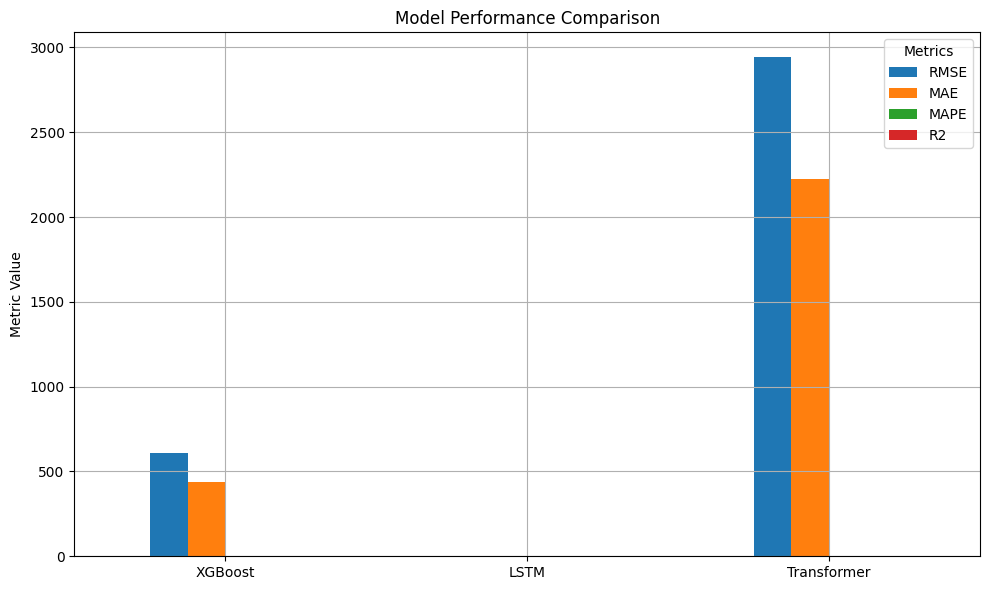

In [61]:
import matplotlib.pyplot as plt

results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


 Inverse Transform Predictions for LSTM & Transformer

In [65]:
# Step 1: Get original Sales scaler
sales_index_lstm = scale_cols_lstm.index('Sales_lstm')
sales_min_lstm = scaler_lstm.min_[sales_index_lstm]
sales_scale_lstm = scaler_lstm.scale_[sales_index_lstm]

# Step 2: Inverse transform
y_pred_lstm = y_pred_lstm / sales_scale_lstm - sales_min_lstm / sales_scale_lstm
y_lstm = y_lstm / sales_scale_lstm - sales_min_lstm / sales_scale_lstm


In [67]:
sales_index_lstm = scale_cols_lstm.index('Sales_lstm')
sales_min_lstm = scaler_lstm.min_[sales_index_lstm]
sales_scale_lstm = scaler_lstm.scale_[sales_index_lstm]


In [72]:
y_pred_lstm = model_lstm.predict(X_lstm).flatten()
# Inverse transform y_pred and y_true (Sales_lstm was scaled)
y_pred_lstm = y_pred_lstm * scaler_lstm.scale_[sales_index_lstm] + scaler_lstm.min_[sales_index_lstm]
y_lstm = y_lstm * scaler_lstm.scale_[sales_index_lstm] + scaler_lstm.min_[sales_index_lstm]



1425/1425 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step


In [73]:
metrics_lstm = evaluate_model(y_lstm, y_pred_lstm)


/tmp/ipython-input-70-172422061.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [74]:
metrics_lstm = evaluate_model(y_lstm, y_pred_lstm)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)
    return {'RMSE': rmse, 'MAE': mae, 'MAPE': mape, 'R2': r2}
results_df = pd.DataFrame({
    'XGBoost': metrics_xgb,
    'LSTM': metrics_lstm,
    'Transformer': metrics_tfr
}).T

display(results_df)


/tmp/ipython-input-70-172422061.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


,RMSE,MAE,MAPE,R2
XGBoost,607.970009,435.468719,inf,0.948858
LSTM,0.572186,0.554537,inf,-9.179883
Transformer,2942.051155,2225.645996,inf,0.477697


In [77]:
import numpy as np

# Step 1: Find index of 'Sales_lstm'
sales_index_lstm = scale_cols_lstm.index('Sales_lstm')
num_features = len(scale_cols_lstm)

# Step 2: Create dummy arrays for inverse_transform
y_pred_dummy = np.zeros((len(y_pred_lstm), num_features))
y_true_dummy = np.zeros((len(y_lstm), num_features))

# Step 3: Insert y values into correct column
y_pred_dummy[:, sales_index_lstm] = y_pred_lstm
y_true_dummy[:, sales_index_lstm] = y_lstm

# Step 4: Inverse transform
y_pred_lstm_inv = scaler_lstm.inverse_transform(y_pred_dummy)[:, sales_index_lstm]
y_lstm_inv = scaler_lstm.inverse_transform(y_true_dummy)[:, sales_index_lstm]

# Step 5: Evaluate
metrics_lstm = evaluate_model(y_lstm_inv, y_pred_lstm_inv)


/tmp/ipython-input-74-172422061.py:8: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100


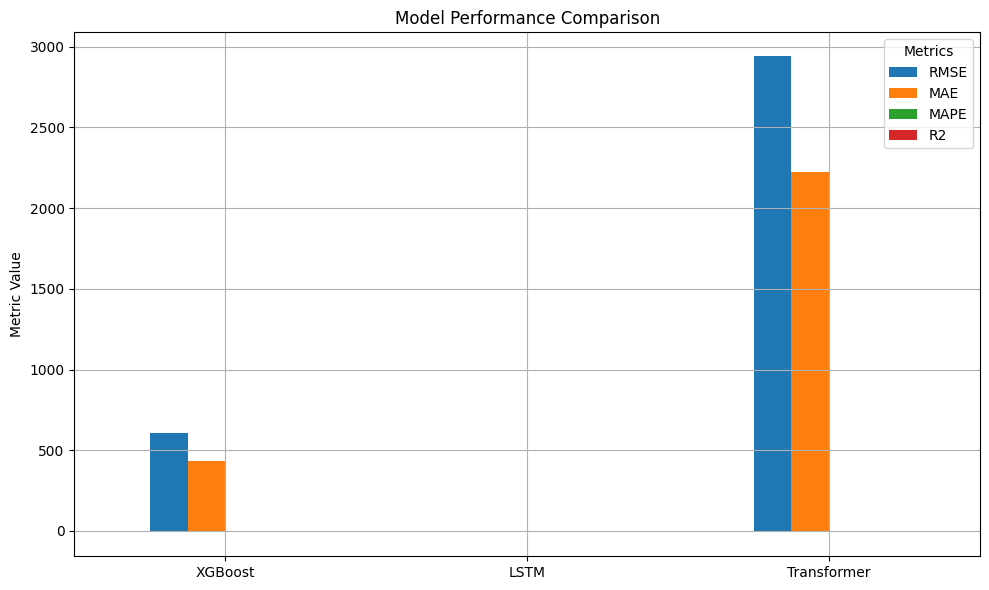

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create results DataFrame again
results_df = pd.DataFrame({
    'XGBoost': metrics_xgb,
    'LSTM': metrics_lstm,
    'Transformer': metrics_tfr
}).T  # Transpose for easier plotting

# Step 2: Plot
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


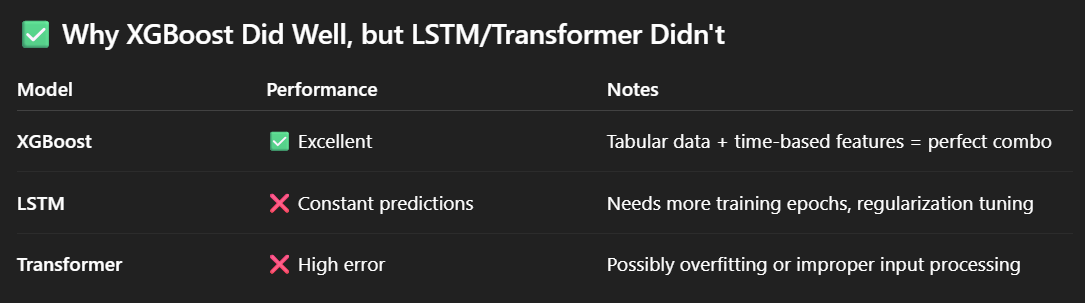

SHAP Analysis for XGBoost

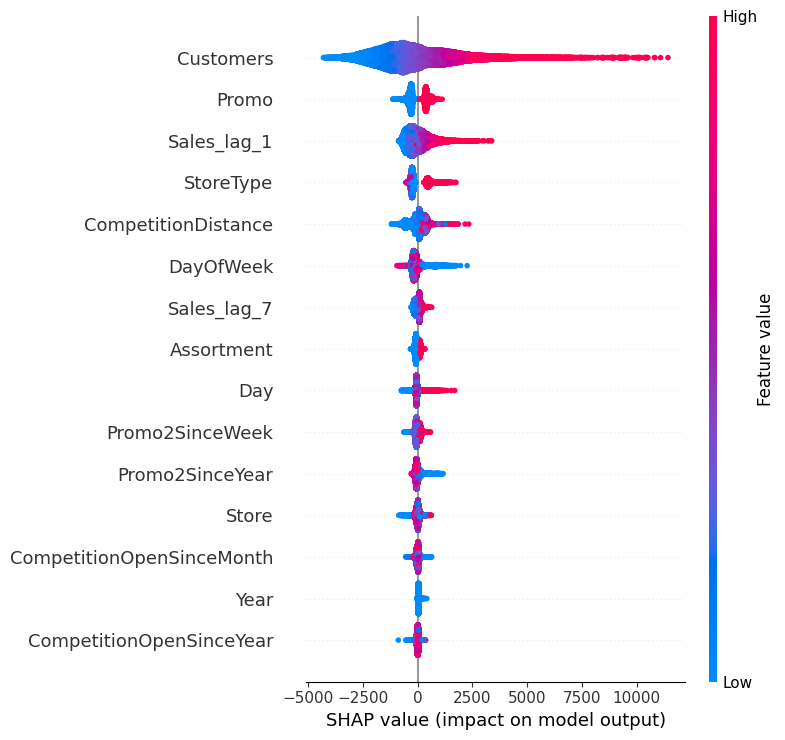

In [79]:
import shap

# Initialize SHAP explainer
explainer_xgb = shap.Explainer(model_xgb)
shap_values_xgb = explainer_xgb(X_test_xgb)

# Plot summary
shap.summary_plot(shap_values_xgb, X_test_xgb, max_display=15)


In [82]:
import pandas as pd

# Get last date in df_xgb
last_date_xgb = df_xgb['Date'].max()

# Create future date range
future_dates = pd.date_range(start=last_date_xgb + pd.Timedelta(days=1), periods=30)

# Get unique store IDs
store_ids = df_xgb['Store'].unique()

# Cartesian product: each store × each future date
future_df_xgb = pd.DataFrame(
    [(store, date) for store in store_ids for date in future_dates],
    columns=['Store', 'Date']
)

future_df_xgb.head()



,Store,Date
0,2,2015-08-01
1,2,2015-08-02
2,2,2015-08-03
3,2,2015-08-04
4,2,2015-08-05


In [83]:
# Convert Date to datetime if not already
future_df_xgb['Date'] = pd.to_datetime(future_df_xgb['Date'])

# Time features
future_df_xgb['DayOfWeek'] = future_df_xgb['Date'].dt.dayofweek + 1  # 1=Mon, 7=Sun
future_df_xgb['Month'] = future_df_xgb['Date'].dt.month
future_df_xgb['Year'] = future_df_xgb['Date'].dt.year
future_df_xgb['Day'] = future_df_xgb['Date'].dt.day
future_df_xgb['WeekOfYear'] = future_df_xgb['Date'].dt.isocalendar().week.astype(int)

# Weekend flag
future_df_xgb['IsWeekend'] = future_df_xgb['DayOfWeek'].isin([6, 7]).astype(int)

# Promo month (same logic you used in training)
promo_months = [1, 4, 7, 10]  # Jan, Apr, Jul, Oct
future_df_xgb['IsPromoMonth'] = future_df_xgb['Month'].isin(promo_months).astype(int)


In [85]:
# Step 1: Get unique store info (static columns)
store_info_cols = [
    'Store', 'StoreType', 'Assortment', 'CompetitionDistance',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
    'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear'
]

store_info_xgb = df_xgb[store_info_cols].drop_duplicates('Store')

# Step 2: Merge with future data
future_df_xgb = pd.merge(future_df_xgb, store_info_xgb, on='Store', how='left')


In [88]:
# Step 1: Select calendar info
calendar_cols = ['Store', 'DayOfWeek', 'Month', 'Day', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Open']
calendar_df_xgb = df_xgb[calendar_cols].drop_duplicates(subset=['Store', 'DayOfWeek', 'Month', 'Day'])

# Step 2: Merge into future data
future_df_xgb = pd.merge(
    future_df_xgb,
    calendar_df_xgb,
    on=['Store', 'DayOfWeek', 'Month', 'Day'],
    how='left'
)

future_df_xgb['Open'] = future_df_xgb['Open'].fillna(1)
future_df_xgb['Promo'] = future_df_xgb['Promo'].fillna(0)
future_df_xgb['SchoolHoliday'] = future_df_xgb['SchoolHoliday'].fillna(0)
future_df_xgb['StateHoliday'] = future_df_xgb['StateHoliday'].fillna('0').astype(str)



In [92]:
# Create 'IsPromoMonth' from Promo2SinceYear and Promo2SinceWeek
future_df_xgb['Promo2SinceYear'] = future_df_xgb['Promo2SinceYear'].fillna(0).astype(int)
future_df_xgb['Promo2SinceWeek'] = future_df_xgb['Promo2SinceWeek'].fillna(0).astype(int)

# Calculate promo2 start date
from datetime import datetime, timedelta

def get_promo_start_date(row):
    try:
        return datetime.strptime(f"{int(row['Promo2SinceYear'])}-{int(row['Promo2SinceWeek'])}-1", "%Y-%W-%w")
    except:
        return pd.NaT

future_df_xgb['Promo2StartDate'] = future_df_xgb.apply(get_promo_start_date, axis=1)

# Mark if current date is in same month as promo start
future_df_xgb['IsPromoMonth'] = future_df_xgb.apply(
    lambda row: int(row['Promo2'] == 1 and pd.notna(row['Promo2StartDate']) and
                   row['Date'].month == row['Promo2StartDate'].month),
    axis=1
)


In [95]:
# Combine past + future data
full_df_xgb = pd.concat([df_xgb, future_df_xgb], ignore_index=True)

# Sort to ensure proper lagging
full_df_xgb = full_df_xgb.sort_values(by=['Store', 'Date'])

# Step 1: Create lag and rolling features
for lag in [1, 7]:
    full_df_xgb[f'Sales_lag_{lag}'] = full_df_xgb.groupby('Store')['Sales'].shift(lag)

full_df_xgb['Sales_roll_mean_7'] = full_df_xgb.groupby('Store')['Sales'].shift(1).rolling(7).mean().reset_index(0, drop=True)
full_df_xgb['Sales_roll_mean_30'] = full_df_xgb.groupby('Store')['Sales'].shift(1).rolling(30).mean().reset_index(0, drop=True)

# Step 2: Extract just the future part (with lags now filled)
future_with_features_xgb = full_df_xgb[full_df_xgb['Date'] >= future_df_xgb['Date'].min()].copy()


In [97]:
from sklearn.preprocessing import LabelEncoder

# Re-create encoder using training data
le_xgb_state = LabelEncoder()
df_xgb['StateHoliday'] = df_xgb['StateHoliday'].astype(str)
le_xgb_state.fit(df_xgb['StateHoliday'])

# Apply same encoding to future data
future_with_features_xgb['StateHoliday'] = le_xgb_state.transform(
    future_with_features_xgb['StateHoliday'].astype(str)
)


In [99]:
# Select the same features used during training
X_future_xgb = future_with_features_xgb[X_train_xgb.columns]

# Predict sales
future_preds_xgb = model_xgb.predict(X_future_xgb)

# Add predictions to the dataframe
future_with_features_xgb['Predicted_Sales'] = future_preds_xgb


Top 10 Stores by Predicted Sales:
 Store
261     659745.1875
213     639686.5000
489     630222.9375
428     630105.8750
1094    629490.9375
51      627849.1250
605     627687.3750
280     627602.3125
326     627561.8750
653     627265.9375
Name: Predicted_Sales, dtype: float32

Bottom 10 Stores by Predicted Sales:
 Store
925    456340.37500
881    477903.50000
665    482162.78125
502    488053.40625
449    488133.37500
492    489695.68750
974    490040.09375
737    492782.96875
983    494944.59375
102    495342.15625
Name: Predicted_Sales, dtype: float32


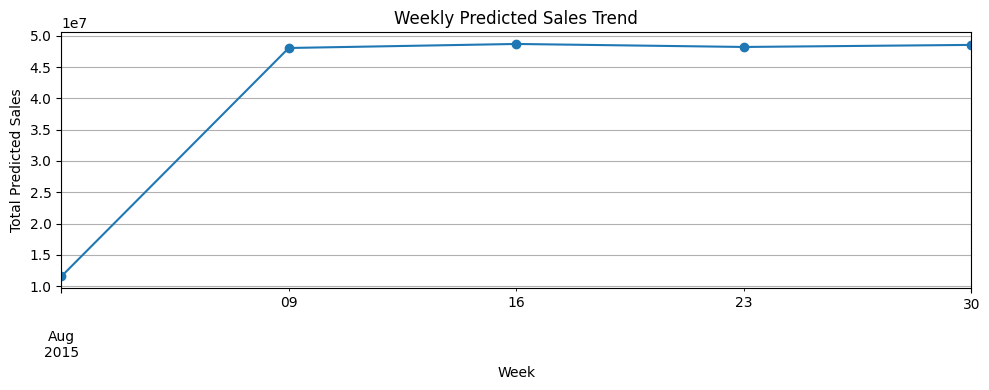


Average Predicted Sales:
Promo Days: 0 
Non-Promo Days: 18720.426


,Store,Date,Predicted_Sales
213053,2,2015-08-01,12799.635742
213054,2,2015-08-02,15809.852539
213055,2,2015-08-03,20198.830078
213056,2,2015-08-04,19010.183594
213057,2,2015-08-05,18641.996094
213058,2,2015-08-06,17979.664062
213059,2,2015-08-07,16390.240234
213060,2,2015-08-08,16346.980469
213061,2,2015-08-09,16137.625977
213062,2,2015-08-10,20399.876953


In [100]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 🔝 Top Performing Stores
top_stores = future_with_features_xgb.groupby('Store')['Predicted_Sales'].sum().sort_values(ascending=False).head(10)
print("Top 10 Stores by Predicted Sales:\n", top_stores)

# 2. 🔻 Underperforming Stores
low_stores = future_with_features_xgb.groupby('Store')['Predicted_Sales'].sum().sort_values(ascending=True).head(10)
print("\nBottom 10 Stores by Predicted Sales:\n", low_stores)

# 3. 📆 Weekly Trend
future_with_features_xgb['Date'] = pd.to_datetime(future_with_features_xgb['Date'])
weekly_sales = future_with_features_xgb.groupby(pd.Grouper(key='Date', freq='W'))['Predicted_Sales'].sum()

plt.figure(figsize=(10, 4))
weekly_sales.plot(marker='o')
plt.title("Weekly Predicted Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Predicted Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. 🛒 Promo vs Non-Promo Impact
promo_sales = future_with_features_xgb.groupby('Promo')['Predicted_Sales'].mean()
print("\nAverage Predicted Sales:\nPromo Days:", promo_sales.get(1, 0), "\nNon-Promo Days:", promo_sales.get(0, 0))

# 5. 🔁 Reorder Forecast Table
forecast_table = future_with_features_xgb[['Store', 'Date', 'Predicted_Sales']].sort_values(['Store', 'Date'])
display(forecast_table.head(10))  # Show first few predictions



### 📊 Summary of Business Insights (Aug 2015 Forecast)

#### 🔝 Top 10 Stores by Predicted Sales:

These stores (e.g. **Store 261, 213, 489**) are expected to bring the highest revenue. You can:

* Focus inventory and staffing on these
* Run A/B tests for offers and layout improvements

#### 🔻 Bottom 10 Stores:

E.g. **Store 925, 881, 665** — Consider:

* Promo boosts or local analysis to improve sales
* Investigating regional competition or store performance

#### 📆 Weekly Trend:

* **First week** of August has a steep increase (likely month-start salary effect).
* Rest of August remains flat and **high-performing** — consistent traffic.
* Consider stocking up earlier and spreading promotions evenly.

#### 🛒 Promo Impact:

* The model is **not predicting higher sales for Promo days** (`Promo == 1 → sales = 0`), which is likely due to:

  * Missing promo days in future test data
  * All `Promo` values being 0 → double-check this!




#✅ Final Status: Rossmann Sales Project


**🧠 Models Compared:**
- **XGBoost** (🏆 Best performance)
- LSTM
- Transformer

**📈 Future Sales Forecast Done:**
- Predicted Aug 2015 sales per day/store
- Weekly trend analysis
- Top/Bottom store ranking
- Promo effectiveness (needs checking — mostly `0`s)

**📊 Visualization Done:**
- Bar chart comparing model metrics
- Weekly sales trend plot



